In [1]:
!pip install qiskit


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.9 MB/s  0:00:0013.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


#

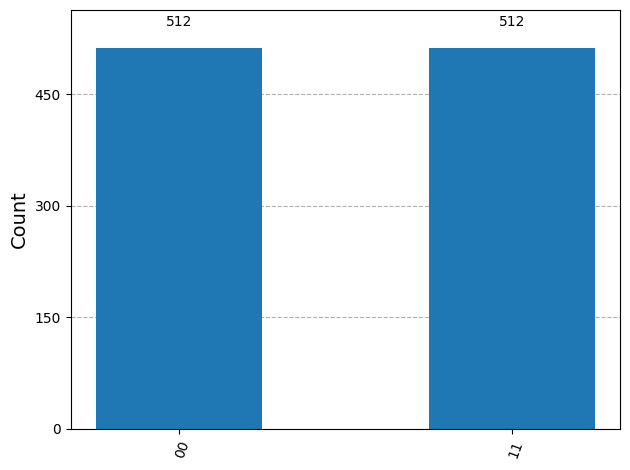

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize a Quantum Circuit with 2 qubits and 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Measure the qubits
qc.measure([0,1], [0,1])

# Initialize the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_circuit = transpile(qc, simulator)

# Execute the circuit on the simulator
result = simulator.run(transpiled_circuit, shots=1024).result()

# Extract the counts (the results of the computation)
counts = result.get_counts()

# Use the plot_histogram function to visualize the counts
plot_histogram(counts)



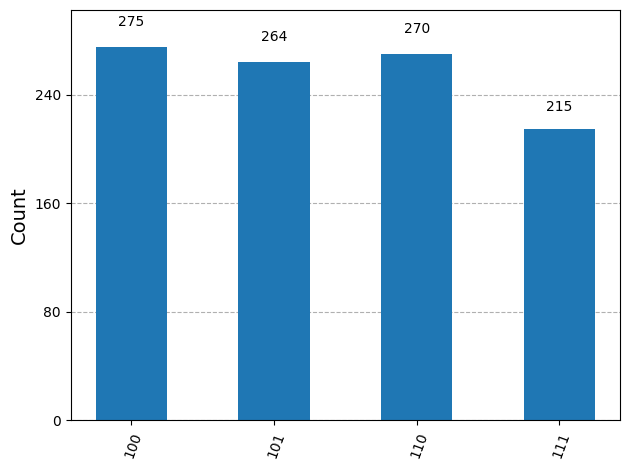

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step A: Prepare the entangled pair (Alice and Bob's qubits)
qc.h(1)  # Apply Hadamard to qubit 1
qc.cx(1, 2)  # Apply CNOT with qubit 1 as control and qubit 2 as target, entangling them

# Step B: Prepare the initial state to teleport (qubit 0)
# Here we simulate teleporting the |1> state for simplicity
qc.x(0)  # Apply X gate to flip qubit 0 to state |1> (this is the state we're teleporting)

# Step C: Perform the teleportation protocol
## Bell measurement on the qubit to teleport (qubit 0) and Alice's qubit (qubit 1)
qc.cx(0, 1)  # Apply CNOT with qubit 0 as control and qubit 1 as target
qc.h(0)  # Apply Hadamard to qubit 0
qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1

## Depending on the result of the measurement, apply corrections to Bob's qubit (qubit 2)
qc.cx(1, 2)  # Apply CNOT with qubit 1 as control and qubit 2 as target
qc.cz(0, 2)  # Apply CZ with qubit 0 as control and qubit 2 as target

# Final measurement to verify the state of qubit 2 (Bob's qubit)
qc.measure(2, 2)

# Initialize the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_circuit = transpile(qc, simulator)

# Execute the circuit on the simulator
result = simulator.run(transpiled_circuit, shots=1024).result()

# Extract the measurement outcomes
counts = result.get_counts()

# Visualize the results with a histogram
plot_histogram(counts)


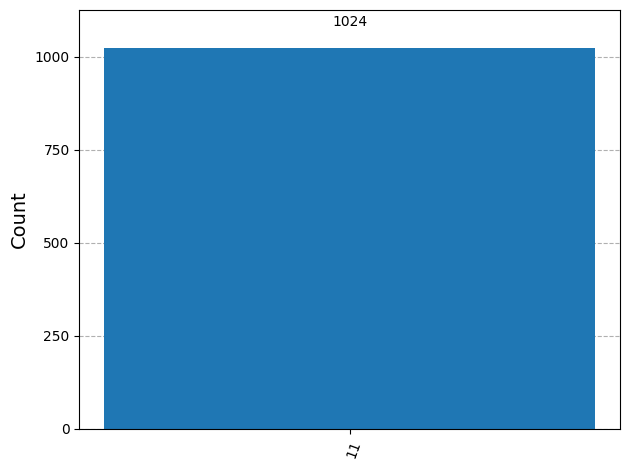

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Number of qubits
n = 2

# Create a Quantum Circuit
qc = QuantumCircuit(n, n)

# Step A: Initialization to Superposition
# Apply Hadamard gates to all qubits to create a superposition of all states
for qubit in range(n):
    qc.h(qubit)

# Step B: Grover's Oracle
# As we are marking the |11> state, we can use a controlled-Z gate
qc.cz(0, 1)  # This will introduce a phase flip only to the |11> state

# Step C: Grover's Diffusion Operator for 2 qubits
qc.h(range(n))
qc.z(range(n))
qc.cz(0, 1)  # This applies a doubly-controlled Z gate, which can also be seen as a CCZ gate
qc.h(range(n))

# Step D: Measurement
qc.measure(range(n), range(n))

# Initialize the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_circuit = transpile(qc, simulator)

# Execute the circuit on the simulator
result = simulator.run(transpiled_circuit, shots=1024).result()

# Extract the measurement outcomes
counts = result.get_counts()

# Use the plot_histogram function to visualize the counts
plot_histogram(counts)


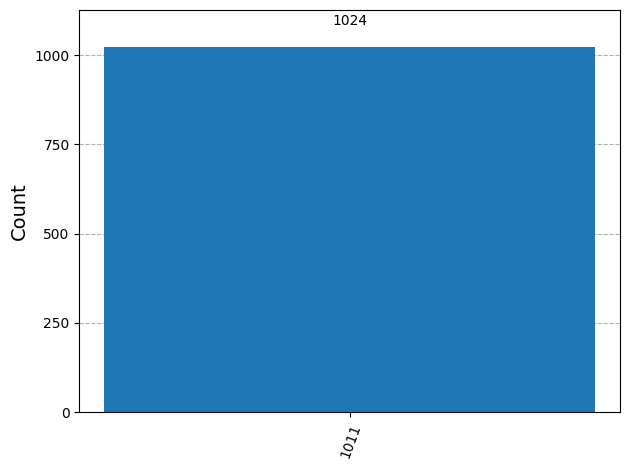

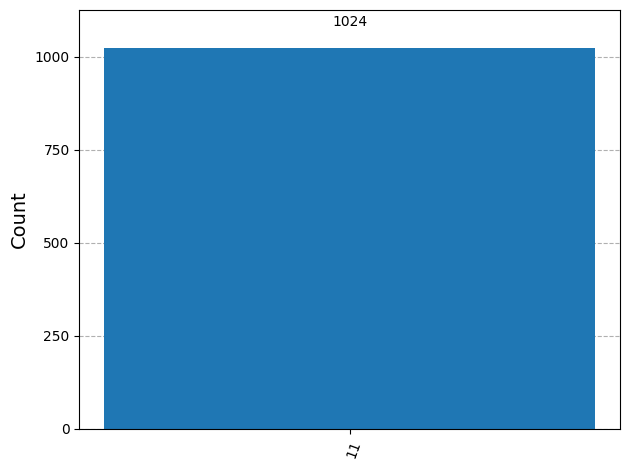

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Define the secret string
s = '1011'

# Create a quantum circuit with n+1 qubits (+1 for the ancilla) and n classical bits
n = len(s)  # Length of the secret string
qc = QuantumCircuit(n+1, n)  # +1 for the ancillary qubit

# Step A: Initialize the ancilla qubit in state |-> and rest in |0>
qc.h(range(n))  # Apply Hadamard to the first n qubits to create superposition
qc.x(n)  # Apply X to the ancillary qubit
qc.h(n)  # Apply H to the ancillary qubit to put it in state |->

# Step B: Apply the Bernstein-Vazirani Oracle
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1':
        qc.cx(ii, n)  # Apply CX controlled by qubit ii, targeting the ancilla

# Step C: Measurement
qc.h(range(n))  # Apply Hadamard again to the first n Qubits
qc.measure(range(n), range(n))  # Measure the first n qubits

# Initialize the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_circuit = transpile(qc, simulator)

# Execute the circuit on the simulator
result = simulator.run(transpiled_circuit, shots=1024).result()

# Extract the measurement outcomes
counts = result.get_counts()

# Visualize the results with a histogram
plot_histogram(counts)

/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_60452/3071525909.py:31: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(num_qubits, do_swaps=False).inverse(), range(num_qubits))


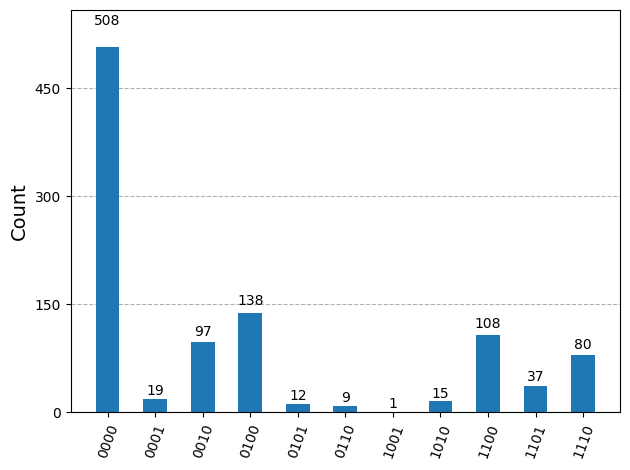

/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_52130/3071525909.py:31: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(num_qubits, do_swaps=False).inverse(), range(num_qubits))


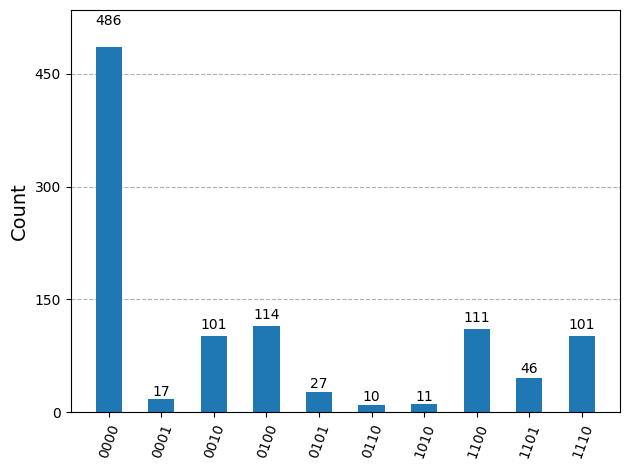

/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_52130/3071525909.py:31: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(num_qubits, do_swaps=False).inverse(), range(num_qubits))


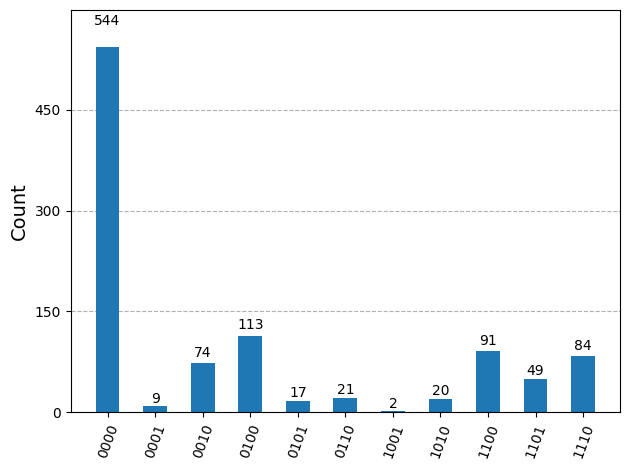

ImportError: cannot import name 'Aer' from 'qiskit' (/Users/neha/planckton/jupyter-planckton/.venv/lib/python3.10/site-packages/qiskit/__init__.py)

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT  # Quantum Fourier Transform for QPE
from qiskit.quantum_info import Operator
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Step 1: Setting up the QPE Circuit
# Assuming a simple phase rotation U operator as an example
# Apply the controlled-U operations
# Note: In Qiskit, quantum bits are ordered from right to left.
num_qubits = 4  # Number of qubits for phase estimation
qc = QuantumCircuit(num_qubits + 1, num_qubits)  # Adding an extra qubit for the eigenstate of U and classical bits for measurement

# Initialize the eigenstate of U
qc.h(num_qubits)  # Apply H to the last qubit assuming |+> as eigenstate of U
qc.barrier()

# Apply H to the first n qubits
qc.h(range(num_qubits))
qc.barrier()

# Implementing controlled-U operations (for simplicity, using a phase kickback mechanism)
angle = np.pi / 4  # Example phase
for qubit in range(num_qubits):
    repetitions = 2**qubit
    for _ in range(repetitions):
        qc.cp(angle, qubit, num_qubits)  # Controlled-phase gate

# Apply inverse QFT
qc.append(QFT(num_qubits, do_swaps=False).inverse(), range(num_qubits))

# Step 2: Measuring the circuit
qc.measure(range(num_qubits), range(num_qubits))

# Step 3: Simulate the Circuit
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

# Step 4: Visualization
plot_histogram(counts)  # Visualization of the outcomes
